In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

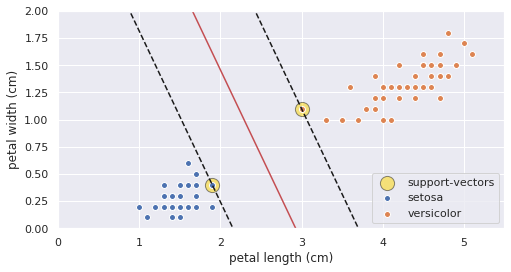

In [2]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris_db = load_iris()
X = iris_db.data[:100, 2:]
y = iris_db.target[:100]

plt.figure(figsize=(8, 4))

svc = SVC(kernel='linear', C=float('inf'))
svc.fit(X, y)

steps = 100
w = svc.coef_[0]
b = svc.intercept_
t = np.linspace(0, 5.5, steps)
boundary = - (w[0] * t + b) / w[1]
boundary_up = boundary + 1 / w[1]
boundary_down = boundary - 1 / w[1]

plt.plot(t, boundary, 'r')
plt.plot(t, boundary_up, 'k--')
plt.plot(t, boundary_down, 'k--')
plt.scatter(svc.support_vectors_[0][0], svc.support_vectors_[0][1], s=200, alpha=0.5, c='gold', ec='k', 
            label='support-vectors')
plt.scatter(svc.support_vectors_[1][0], svc.support_vectors_[1][1], s=200, alpha=0.5, c='gold', ec='k')

plt.scatter(X[np.where(y==0), 0], X[np.where(y==0), 1], ec='w', label=iris_db.target_names[0])
plt.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1], ec='w', label=iris_db.target_names[1])
plt.axis([0, 5.5, 0, 2])
plt.xlabel(iris_db.feature_names[2])
plt.ylabel(iris_db.feature_names[3])
plt.legend()

##  Sensitivity to feature scales

model's boundry: x1 = -0.0425 * x0 + [80.10411987]
model's boundry: x1 = -1.0916699535467218 * x0 + [-0.31080918]


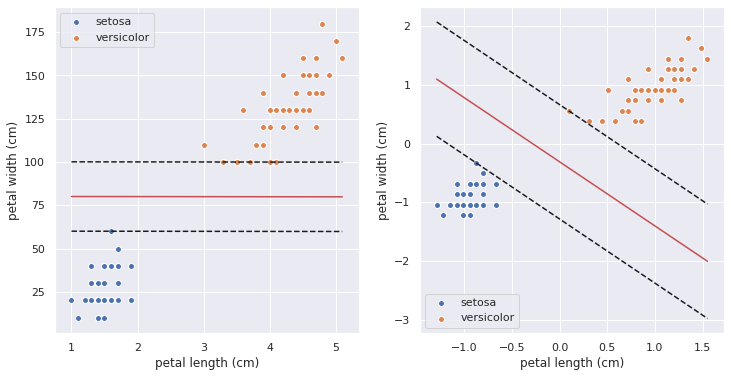

In [3]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
svc_normal = SVC(C=float('inf'), kernel='linear')
svc_scaled = SVC(C=float('inf'), kernel='linear')

X_ = X.copy()
X_[:, 1] *= 100
X_scaled = std_scaler.fit_transform(X_)

svc_normal.fit(X_, y)
svc_scaled.fit(X_scaled, y)

steps = 100

def get_boundries(model, x):
    w = model.coef_[0]
    b = model.intercept_
    boundary = - (w[0] * x + b) / w[1]
    print( f"model's boundry: x1 = {-(w[0]/w[1])} * x0 + {-b/w[1]}")
    boundary_up = boundary + 1 / w[1]
    boundary_down = boundary - 1 / w[1]

    return boundary, boundary_down, boundary_up

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for ax, model, new_X in zip(axes, [svc_normal, svc_scaled], [X_, X_scaled]):
    t = np.linspace(np.min(new_X[:, 0]), np.max(new_X[:, 0]), steps)
    boundary, boundary_down, boundary_up = get_boundries(model, t)
    ax.plot(t, boundary, 'r')
    ax.plot(t, boundary_up, 'k--')
    ax.plot(t, boundary_down, 'k--')
    ax.scatter(new_X[np.where(y==0), 0], new_X[np.where(y==0), 1], ec='w', label=iris_db.target_names[0])
    ax.scatter(new_X[np.where(y==1), 0], new_X[np.where(y==1), 1], ec='w', label=iris_db.target_names[1])
    ax.set_xlabel(iris_db.feature_names[2])
    ax.set_ylabel(iris_db.feature_names[3])
    ax.legend()

## Soft Margin Classification

---
---


- Decision function:
$f(X) = f(x_1, x_2, ..., x_n) = w_1x_1 + w_2x_2 + ... + w_nx_n + b \ge 0$

- Standarization: 
$x_{scaled} = \frac{x-\mu}{\sigma} \Rightarrow x = x_{scaled}\sigma + \mu$

---
---


For SVC decision function for scaled and unscaled values should be equal

$f(X) = w_1x_1 + w_2x_2 + ... + w_nx_n + b = w^{'}_1x^{'}_1 + w^{'}_2x^{'}_2 + ... + w^{'}_nx^{'}_n + b^{'} = (1) $

---

where:
- scaled_values: $ w_1x_1 + w_2x_2 + ... + w_nx_n + b $
- unscaled_values: $ w^{'}_1x^{'}_1 + w^{'}_2x^{'}_2 + ... + w^{'}_nx^{'}_n + b^{'} $

---


contiuation: <br>
$(1) \Rightarrow w^{'}_1(x_1\sigma + \mu) +  ... + w^{'}_n(x_1\sigma + \mu) + b^{'} \Rightarrow w^{'}_1x_1\sigma + ... + w^{'}_nx^{'}_n\sigma + w^{'}_1\mu + ... +  w^{'}_n\mu + b^{'} = (2)$ 

---

from (2): <br>
- $w^{'}_n\sigma = w_n \Rightarrow w^{'}_n = \frac{w_n}{\sigma} =(3)$

---

moreover from (3): <br>
$b = w^{'}_1\mu + ... +  w^{'}_n\mu + b^{'}$ 

$b^{'} = -\frac{\mu}{\sigma}w_1 + -\frac{\mu}{\sigma}w_2 + ... -\frac{\mu}{\sigma}w_n + b = f(-\frac{\mu}{\sigma}) - decision function$


model's boundry: x1 = -0.49999320096590893 * x0 + [32.59932221]
model's boundry: x1 = -0.5000826904216205 * x0 + [14.8187198]
model's boundry: x1 = -0.437110570584213 * x0 + [9.46352837]


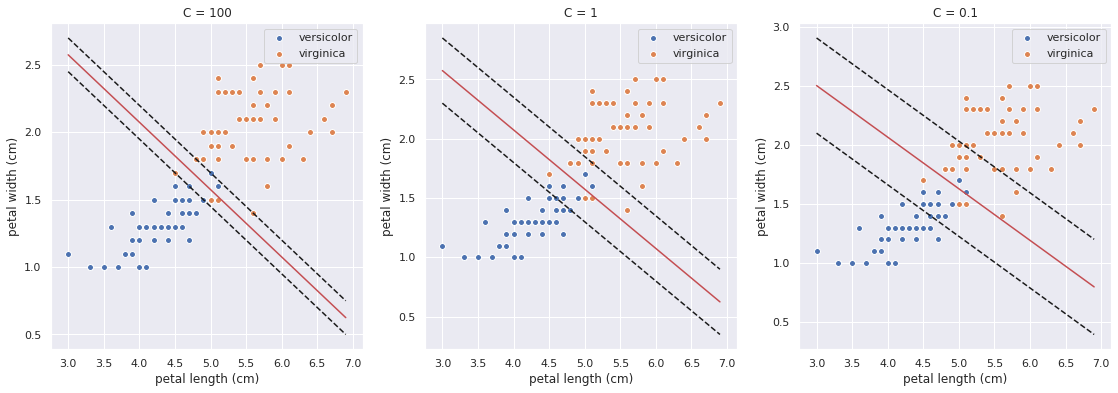

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

X = iris_db.data[50:, 2:]
y = iris_db.target[50:]

# ax.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1], label=iris_db.target_names[1])
# plt.scatter(X[np.where(y==2), 0], X[np.where(y==2), 1], label=iris_db.target_names[2])
# plt.legend()

C_list = [100, 1, 0.1]

scaler = StandardScaler()
models = [LinearSVC(C=x, loss="hinge") for x in C_list]

steps = 100
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(6*len(models) + 1, 6))


for model, ax in zip(models, axes):
    svm_clf = Pipeline((
        ("scaler", scaler),
        ("linear_svc", model)
        ))
    svm_clf.fit(X, y)

    b = model.decision_function([-scaler.mean_ / scaler.scale_])
    w = model.coef_[0] / scaler.scale_

    t = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), steps)
    boundary = - (w[0] * t) / w[1] - b / w[1]
    print( f"model's boundry: x1 = {-(w[0]/w[1])} * x0 + {-b}")
    boundary_up = boundary + 1 / w[1]
    boundary_down = boundary - 1 / w[1]

    ax.plot(t, boundary, 'r')
    ax.plot(t, boundary_up, 'k--')
    ax.plot(t, boundary_down, 'k--')
    ax.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1], label=iris_db.target_names[1], ec='w')
    ax.scatter(X[np.where(y==2), 0], X[np.where(y==2), 1], label=iris_db.target_names[2], ec='w')
    ax.legend()
    ax.set_title(f'C = {model.C}')
    ax.set_xlabel(iris_db.feature_names[2])
    ax.set_ylabel(iris_db.feature_names[3])


In [0]:
from matplotlib.colors import ListedColormap


def draw_clf(model, X, y, meshgrid_steps=100, meshgrid_padding=0.05, fig_size=(6, 6), c_lightering=0.3, 
             feature_names=None, target_names=None, raw_data=False):

    x0_min, x0_max = np.min(X[:, 0]), np.max(X[:, 0])
    x1_min, x1_max = np.min(X[:, 1]), np.max(X[:, 1])

    x0_delta = (x0_max - x0_min) * meshgrid_padding
    x1_delta = (x1_max - x1_min) * meshgrid_padding

    x0_values = np.linspace(x0_min - x0_delta, x0_max + x0_delta, meshgrid_steps);
    x1_values = np.linspace(x1_min - x1_delta, x1_max + x1_delta, meshgrid_steps);

    xx0, xx1 = np.meshgrid(x0_values, x1_values)
    z = model.predict(np.c_[xx0.ravel(), xx1.ravel()])
    z = z.reshape(xx0.shape)

    current_palette = np.array(sns.color_palette()[:len(np.unique(y))])
    lighter_pallete = ListedColormap(current_palette + (1 - current_palette) * c_lightering)

    if raw_data:
        return xx0, xx1, z, lighter_pallete

    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    ax.pcolormesh(xx0, xx1, z, cmap=lighter_pallete)

    labels = [f'class {x} - {target_names[x]}' if isinstance(target_names, (np.ndarray, list)) else f'class {x}' 
              for x in range(len(np.unique(y)))]

    for idx, lbl in enumerate(labels):
        ax.scatter(X[np.where(y==idx), 0], X[np.where(y==idx), 1], label=lbl, ec='w')
        ax.legend()

    ax.set_xlabel(feature_names[0] if feature_names else 'x0')
    ax.set_ylabel(feature_names[1] if feature_names else 'x1')

# Polynomial Feature

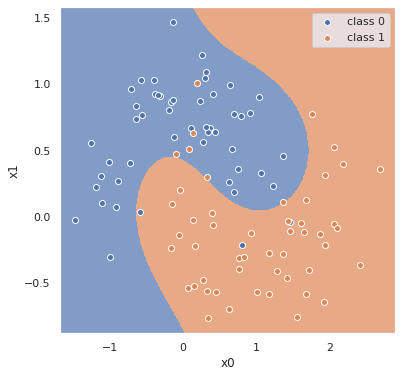

In [106]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures


X, y = make_moons(noise=.25, random_state=42)

poly_feat = PolynomialFeatures(degree=3)
scaler = StandardScaler()
svc = LinearSVC(C=10, loss="hinge")

poly_svc = Pipeline((
    ('poly_feat', poly_feat),
    ('scaler', scaler),
    ('svm', svc)
))

poly_svc.fit(X, y)
draw_clf(poly_svc, X, y, meshgrid_steps=500)

# Support Vector Machine Kernel

### Polynomian Kernel

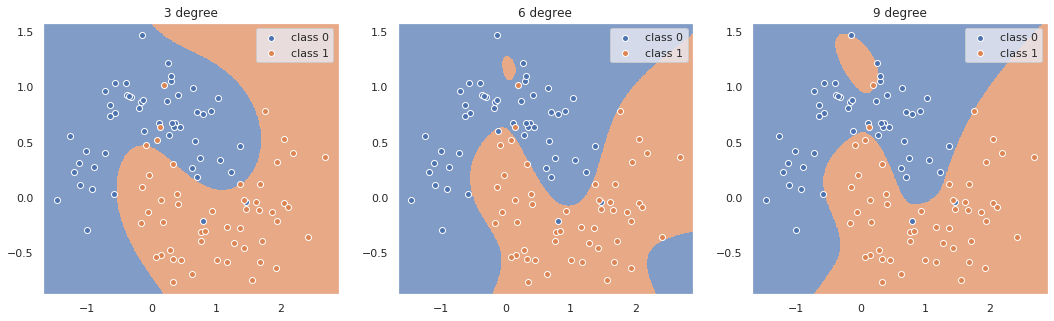

In [103]:
degrees = [3, 6, 9]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for degree, ax in zip(degrees, axes):
    svc = SVC(kernel="poly", degree=degree, coef0=1, C=5)
    poly_svc = Pipeline((
        ('scaler', scaler),
        ('svm', svc)
    ))

    poly_svc.fit(X, y)
    xx0, xx1, z, pallete = draw_clf(poly_svc, X, y, raw_data=True, meshgrid_steps=500)
    ax.pcolormesh(xx0, xx1, z, cmap=pallete)
    ax.scatter(X[np.where(y==0), 0], X[np.where(y==0), 1], label='class 0', ec='w')
    ax.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1], label='class 1', ec='w')
    ax.legend()
    ax.set_title(f'{degree} degree')

### Gaussian Radial Basis Function (RBF) Kernel

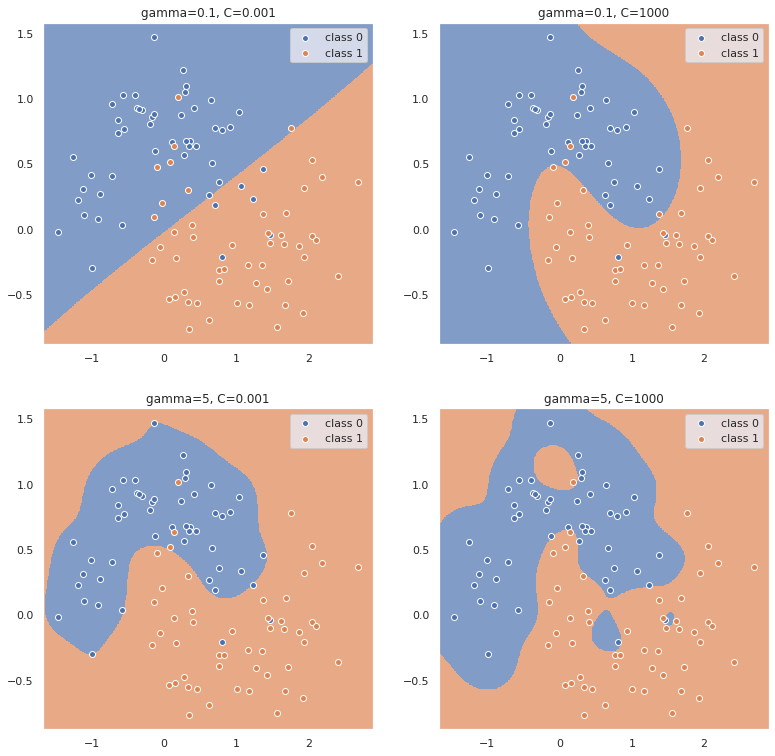

In [102]:
hyperparameters = dict(gamma=[0.1, 5], C=[0.001, 1000])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 13))

for row, hyper_gamma in zip(axes, hyperparameters['gamma']):
    for ax, hyper_C in zip(row, hyperparameters['C']):

        svc = SVC(kernel="rbf", gamma=hyper_gamma, C=hyper_C)
        rbf_svc = Pipeline((
            ('scaler', scaler),
            ('svm', svc)
        ))

        rbf_svc.fit(X, y)
        xx0, xx1, z, pallete = draw_clf(rbf_svc, X, y, raw_data=True, meshgrid_steps=500)
        ax.pcolormesh(xx0, xx1, z, cmap=pallete)
        ax.scatter(X[np.where(y==0), 0], X[np.where(y==0), 1], label='class 0', ec='w')
        ax.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1], label='class 1', ec='w')
        ax.legend()
        ax.set_title(f'gamma={hyper_gamma}, C={hyper_C}')
        
